# Treatments and Interventions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../curated data/IN_2020-09-04.csv')
df.head()

C:\Users\Ridha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,9,10,14,17,18,19,20,22,23,29,38,43,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STUDYID,DOMAIN,USUBJID,INSEQ,INGRPID,INTRT,INMODIFY,INDECOD,INMOOD,INCAT,...,INSTRTPT,INSTTPT,INENRTPT,INENTPT,INEVINTX,INCDSTDY,DOSVOMIT,DOTIND,RDIND,TDOSIND
0,EJPDEJ,IN,8027,9,NaN,Ceftriazone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EJPDEJ,IN,8027,8,NaN,Cefixime,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EJPDEJ,IN,8027,15,NaN,Ringer's lactate and glucose,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EJPDEJ,IN,8027,4,NaN,Plumpynut,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EJPDEJ,IN,8027,12,NaN,Diazepam,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195300 entries, 0 to 1195299
Data columns (total 55 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   STUDYID   1195300 non-null  object 
 1   DOMAIN    1195300 non-null  object 
 2   USUBJID   1195300 non-null  int64  
 3   INSEQ     1195300 non-null  int64  
 4   INGRPID   0 non-null        float64
 5   INTRT     1195300 non-null  object 
 6   INMODIFY  0 non-null        float64
 7   INDECOD   15705 non-null    object 
 8   INMOOD    0 non-null        float64
 9   INCAT     199 non-null      object 
 10  INSCAT    50462 non-null    object 
 11  INPRESP   1192084 non-null  object 
 12  INOCCUR   738068 non-null   object 
 13  INSTAT    529086 non-null   object 
 14  INREASND  243464 non-null   object 
 15  ININDC    0 non-null        float64
 16  INDOSE    32229 non-null    float64
 17  INDOSTXT  667 non-null      object 
 18  INDOSU    39377 non-null    object 
 19  INDOSFRM  4820 non-nu

The features are :

**STUDYID** : Study identifier

**DOMAIN** : Domain Abbreviation

**USUBJID** : Unique Subject Identifier

**INSEQ** : Observation Sequence Number

**INGRPID** : Group ID => No values

**INTRT** : Reported Name of Drug or Intervention

**INMODIFY** : Modified Reported Term for the Event => No values

**INDECOD** : Standardized Term

**INMOOD** : *Not in the dictionary*

**INCAT** : Category for Observation

**INSCAT** : SubCategory for Observation

**INPRESP** : Pre-Specified Observation

**INOCCUR** : Observation Occurrence

**INSTAT** : Completion Status

**INREASND** : Reason Not Done

**ININDC** : Indication => No values

**INDOSE** : Dose per Administration 

**INDOSTXT** : Dose Description

**INDOSU** : Dose Units

**INDOSFRM** : Dose Form

**INDOSFRQ** : Dosing Frequency per Interval

**INDOSTOT** : Total Daily Dose

**INDOSRGM** : Intended Dose Regimen

**INROUTE** : Route of Administration

**INLOT** : Lot Number => No values

**INLOC** : Location of Dose Administration => No values

**INFAST** : Fasting Status => No values

**INPSTRG** : Pharmaceutical Strength => No values

**INPSTRGU** : Pharmaceutical Strength Units => No values

**INADJ** : Reason for Dose Adjustment => Only 4 values

**INRSDISC** : Reason the Drug or Intervention was Discontinued => No values

**VISITNUM** : Visit Number

**VISIT** : Visit Name => No values

**VISITDY** : Planned Study Day of Visit => No values

**EPOCH** : Epoch

**INDTC** : Date/Time of Intervention => Not present in the dataset

**INSTDTC** : Start Date/Time of Observation => Not present in the dataset

**INENDTC** : End Date/Time of Observation => Not present in the dataset

**INDY** : Study Day of Intervention => Not present in the dataset

**INSTDY** : Study Day of Start of Observation

**INENDY** : Study Day of End of Observation => Only 56 values

**INDUR** : Duration of Observation => No values

**INTPT** : Planned Time Point Name

**INTPTNUM** : Planned Time Point Number

**INELTM** : Planned Elapsed Time from Time Point Ref => No values

**INTPTREF** : Time Point Reference => No values

**INRFTDTC** : Date/Time of Reference Time Point => No values

**INSTRF** : Start Relative to Reference Period => Only 86 values

**INENRF** : End Relative to Reference Period => No values

**INSTRTPT** : End Relative to Reference Time Point

**INSTTPT** : End Reference Time Point 

**INENRTPT** : End Relative to Reference Time Point => No values

**INENTPT** : End Reference Time Point => No values

**INEVINTX** : Evaluation Interval Text => No values

**INCDSTDY** : Contributor-Reported Study Day => No values

**DOSVOMIT** : Dose Vomited Indicator => No values

**DOTIND** : Directly Observed Therapy Indicator => No values

**RDIND** : Redose Indicator => No values

**TDOSIND** : Total Dose Indicator => No values

We need to drop features that have no values

In [5]:
features_no_values = ['INGRPID','INMODIFY','INMOOD','ININDC','INLOT','INLOC','INFAST','INPSTRG',
                      'INPSTRGU','INRSDISC', 'VISIT', 'VISITDY', 'INDUR','INELTM','INTPTREF','INRFTDTC','INENRF','INENRTPT',
                      'INENTPT','INEVINTX','INCDSTDY','DOSVOMIT','DOTIND','RDIND','TDOSIND']

df.drop(columns=features_no_values,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195300 entries, 0 to 1195299
Data columns (total 30 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   STUDYID   1195300 non-null  object 
 1   DOMAIN    1195300 non-null  object 
 2   USUBJID   1195300 non-null  int64  
 3   INSEQ     1195300 non-null  int64  
 4   INTRT     1195300 non-null  object 
 5   INDECOD   15705 non-null    object 
 6   INCAT     199 non-null      object 
 7   INSCAT    50462 non-null    object 
 8   INPRESP   1192084 non-null  object 
 9   INOCCUR   738068 non-null   object 
 10  INSTAT    529086 non-null   object 
 11  INREASND  243464 non-null   object 
 12  INDOSE    32229 non-null    float64
 13  INDOSTXT  667 non-null      object 
 14  INDOSU    39377 non-null    object 
 15  INDOSFRM  4820 non-null     object 
 16  INDOSFRQ  101 non-null      object 
 17  INDOSTOT  5519 non-null     float64
 18  INDOSRGM  98 non-null       object 
 19  INROUTE   1032 non-nu

In [7]:
len(df[df.duplicated()])

0

### Correlation Matrix

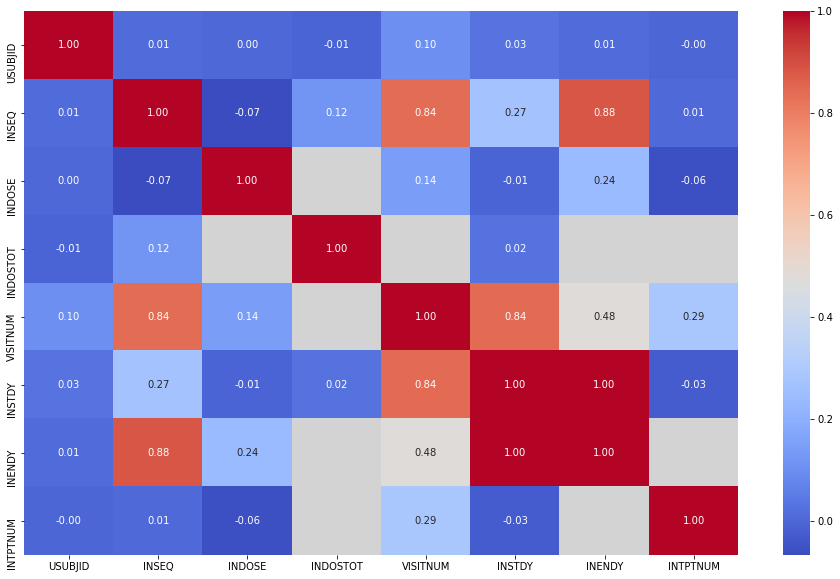

In [8]:
plt.figure(figsize=(16, 10))
corr = df.corr()
color = plt.get_cmap('coolwarm')
color.set_bad('lightgrey') 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns ,annot=True, fmt=".2f", cmap = color)
plt.show()

### Study identifier

We first look the number of records we have per study.

In [9]:
stdy_id_count = df['STUDYID'].value_counts()
stdy_id_count.sort_index(inplace = True)
stdy_id_count

EJPDEJ    223329
EOPNOJ      6764
EORKWS       675
EQJJGF    185757
ERFCVU    770567
ESYADD      8208
Name: STUDYID, dtype: int64

In [10]:
len(stdy_id_count)

6

In [11]:
sum(stdy_id_count)

1195300

We have 6 studies.

We then look at the number of people per study.

In [12]:
stdy_subid_count = df.groupby('STUDYID').USUBJID.nunique()
stdy_subid_count.sort_index(inplace = True)
stdy_subid_count

STUDYID
EJPDEJ    2301
EOPNOJ     136
EORKWS      17
EQJJGF     965
ERFCVU    2105
ESYADD     456
Name: USUBJID, dtype: int64

In [13]:
sum(stdy_subid_count)

5980

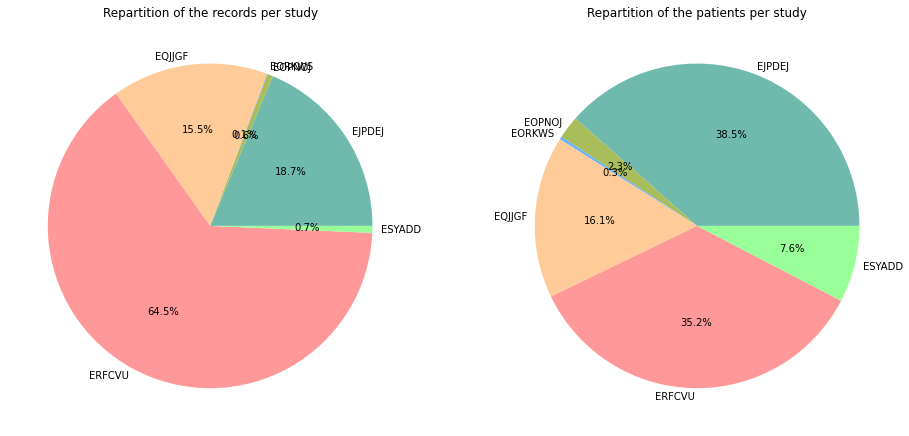

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

colors = ["#6FBAaD",'#A9BD5A', '#66b3ff', '#ffcc99','#ff9999','#99ff99', "#ffb266"]

ax1.pie(stdy_id_count.values,labeldistance=1.05, colors=colors, labels=stdy_id_count.index, autopct='%1.1f%%',
          startangle=0)

ax1.set_title("Repartition of the records per study")


ax2.pie(stdy_subid_count.values, labeldistance=1.05, colors=colors, labels=stdy_subid_count.index, autopct='%1.1f%%',
          startangle=0)

ax2.set_title("Repartition of the patients per study")

plt.show()

###  Domain abreviation 

In [15]:
df['DOMAIN'].value_counts()

IN    1195300
Name: DOMAIN, dtype: int64

### Unique Subject Identifier for a study

In [16]:
df['USUBJID'].value_counts()

7866    2966
2148    2828
5178    2676
4671    2437
1780    2379
        ... 
8795       1
5256       1
3488       1
3652       1
2786       1
Name: USUBJID, Length: 5980, dtype: int64

We can have a lot of records for one person.

### Observation Sequence Number

In [17]:
df['INSEQ'].isna().sum() / len(df)

0.0

In [18]:
df['INSEQ'].value_counts()

1       5980
2       5972
3       5969
4       5969
5       5968
        ... 
2859       1
2919       1
2918       1
2921       1
2905       1
Name: INSEQ, Length: 2966, dtype: int64

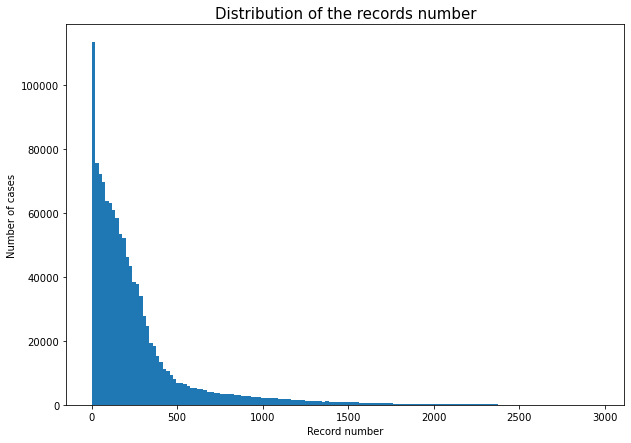

In [19]:
fig, ax = plt.subplots(figsize=(10,7))

plt.hist(df['INSEQ'], bins = 150)
ax.set_title("Distribution of the records number",size=15)
ax.set_xlabel('Record number')
ax.set_ylabel('Number of cases')
#plt.yscale('log')
plt.show()

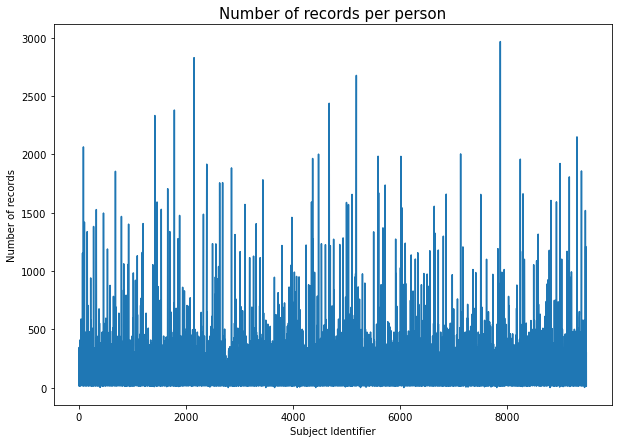

In [20]:
fig, ax = plt.subplots(figsize=(10,7))

df.groupby('USUBJID').INSEQ.max().plot()

ax.set_title("Number of records per person",size=15)
ax.set_xlabel('Subject Identifier')
ax.set_ylabel('Number of records')
plt.show()

In [21]:
df.groupby('USUBJID').INSEQ.max().value_counts().head(10)

17     1579
18      457
200     174
300     138
184     134
100      93
50       91
75       84
276      82
306      82
Name: INSEQ, dtype: int64

A lot of people have 17 records.

### Reported Name of Drug or Intervention

In [22]:
df['INTRT'].isna().sum() / len(df)

0.0

In [23]:
df['INTRT'] = df['INTRT'].str.lower()

In [24]:
df['INTRT'].value_counts()

paracetamol                46439
cefixime                   46336
omeprazole                 46133
ciprofloxacin              45967
diazepam                   45514
                           ...  
phanegeon                      1
ondanstew                      1
lopeamide                      1
allclovir                      1
tetracycli eye ointment        1
Name: INTRT, Length: 629, dtype: int64

fig, ax = plt.subplots(figsize=(20,10))

df['INTRT'].value_counts()[:80].plot(kind ="bar")

ax.set_title("Distribution of the drug or treatment (top 80)",size=15)
ax.set_xlabel('Drug or Treatment')
ax.set_ylabel('Number of cases')

plt.show()

### Standardized Term

In [25]:
df['INDECOD'].isna().sum() / len(df)

0.9868610390696896

We have a lot of missing values.

In [26]:
df['INDECOD'].value_counts()

ARTEMETHER    15704
IVERMECTIN        1
Name: INDECOD, dtype: int64

### Category for Observation

In [27]:
df['INCAT'].isna().sum() / len(df)

0.9998335145988455

We have a lot of missing values.

In [28]:
df['INCAT'].value_counts()

TRIAL DRUG           101
ANTIEMETIC            35
SUPPLEMENTS           30
GASTROINTESTINAL      23
ANTIBIOTIC             4
ANALGESIC              3
GENERAL NUTRIENTS      2
CARDIOVASCULAR         1
Name: INCAT, dtype: int64

### SubCategory for Observation

In [29]:
df['INSCAT'].isna().sum() / len(df)

0.9577829833514598

In [30]:
df['INSCAT'].value_counts()

OTHER TREATMENT    50462
Name: INSCAT, dtype: int64

### Pre-Specified Observation

A value of "Y" indicates that this observation was pre-specified on the CRF (cahier de recherche formalisé). Values are null/"N" for spontaneously reported events (i.e., those collected as free-text verbatim terms).

In [31]:
df['INPRESP'].isna().sum() / len(df)

0.002690537940266042

In [32]:
df['INPRESP'].value_counts()

Y    1192084
Name: INPRESP, dtype: int64

### Observation Occurrence

Used when the occurrence of specific observations is solicited, to indicate whether or not an encounter occurred. Values are null for spontaneously reported events.

In [33]:
df['INOCCUR'].isna().sum() / len(df)

0.38252488914916755

In [34]:
df['INOCCUR'].value_counts()

N    492219
Y    170761
U     75088
Name: INOCCUR, dtype: int64

### Completion Status

This variable contains information about the status of the observation – specifically that it was not completed when it was expected to have been.

In [35]:
df['INSTAT'].isna().sum() / len(df)

0.5573613318832092

In [36]:
df['INSTAT'].value_counts()

NOT DONE    529086
Name: INSTAT, dtype: int64

### Reason Not Done

In [37]:
df['INREASND'].value_counts()

NOT APPLICABLE (NOT INCLUDED ON THE FORM)    76302
NOT RECORDED                                 62859
UNFILLED                                     48379
NOT PROVIDED IN THE CONTRIBUTED DATASET      33993
BLANK IN RAW DATA                            21889
Patient deceased                                42
Name: INREASND, dtype: int64

### Dose

**Dose per Administration (INDOSE)** : gives the amount of INTRT given.

In [38]:
df['INDOSE'].isna().sum() / len(df)

0.973036894503472

In [39]:
df_treatment_dose = pd.DataFrame(df.loc[~df['INDOSE'].isna(), ['INTRT','INDOSE','INDOSU']].groupby(['INTRT','INDOSE','INDOSU']).INDOSE.count())
df_treatment_dose.columns = ['count']
df_treatment_dose.sort_values(by='count', ascending = False, inplace= True)

df_treatment_dose.head(10)

,,,count
INTRT,INDOSE,INDOSU,
kcl,20.0,mEq,3925
vitamin c,1.0,g,3832
paracetamol,1.0,g,2373
omeprazole,20.0,mg,2124
cefixime,400.0,mg,1828
multivitamins,1.0,TABLET,1746
coartem,4.0,TABLET,1720
vitamin c,250.0,mg,1491
vitamin a,200000.0,IU,1178


In [40]:
df_dose_absent = pd.DataFrame(df.loc[df['INDOSE'].isna(),'INTRT'].value_counts())
df_dose_absent.columns = ['absent_dose']
df_dose_present = pd.DataFrame(df.loc[~df['INDOSE'].isna(),'INTRT'].value_counts())
df_dose_present.columns = ['present_dose']

df_dose_absent_present = df_dose_present.join(df_dose_absent, how = 'outer').fillna(0).astype('int').sort_values(by = "present_dose",ascending = False)
df_dose_absent_present['present/absent'] = df_dose_absent_present.apply(lambda row : row.present_dose / row.absent_dose, axis = 1 )
df_dose_absent_present

C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


,present_dose,absent_dose,present/absent
vitamin c,5395,19575,0.275607
paracetamol,4102,42337,0.096889
kcl,3974,36,110.388889
coartem,3078,35032,0.087863
omeprazole,2360,43773,0.053915
...,...,...,...
hydroxyde d'aluminium,0,6,0.000000
honey,0,1,0.000000
hiloperidol,0,3,0.000000
high energy biscuits,0,1,0.000000


In [41]:
sum(df_dose_absent_present['present_dose'])

32229

In [42]:
sum(df_dose_absent_present['absent_dose'])

1163071

**Dose Description (INDOSTXT)** : This variable indicates dosing amounts or a range of dosing information collected in text form. Units may be stored in INDOSU. Examples: "200-400", "15-20". Not populated when INDOSE is populated. 

In [43]:
df['INDOSTXT'].isna().sum()/ len(df)

0.9994419810926127

In [44]:
df['INDOSTXT'].value_counts().head(10)

NORMAL         344
BARELY          76
A LOT           65
F-100            9
+D50(20ML)       7
+D50 20          7
6 BOTTLES        5
500G + 100G      5
+20KCL           5
IM               4
Name: INDOSTXT, dtype: int64

**Dose Form (INDOSFRM)** : This variable contains information about the formulation of the dose of the treatment or intervention listed in INDOSE. This is defined by CDISC Controlled Terminology.

In [45]:
df['INDOSFRM'].isna().sum() / len(df)

0.9959675395298252

In [46]:
df['INDOSFRM'].value_counts()

TABLET        4809
SUSPENSION       6
SYRUP            4
INJECTION        1
Name: INDOSFRM, dtype: int64

**Dosing Frequency per Interval (INDOSFRQ)** : This variable describes the dosing frequency, sually expressed as the number of repeated administrations of INDOSE within a specific time period. Examples: "BID" (twice daily), "Q12H" (every 12 hours).

In [47]:
df['INDOSFRQ'].isna().sum() / len(df)

0.9999155023843387

In [48]:
df['INDOSFRQ'].value_counts()

QD     98
BID     2
PRN     1
Name: INDOSFRQ, dtype: int64

**Total Daily Dose (INDOSTOT) :**

In [49]:
df['INDOSTOT'].isna().sum() /  len(df)

0.9953827491006442

In [50]:
df['INDOSTOT'].value_counts()

1000.0    1449
1500.0    1035
500.0      672
2000.0     326
750.0      291
          ... 
1350.0       1
240.0        1
80.0         1
1.7          1
3750.0       1
Name: INDOSTOT, Length: 102, dtype: int64

**Intended Dose Regimen (INDOSRGM)** :

In [51]:
df['INDOSRGM'].isna().sum() /  len(df)

0.9999180122145068

**Route of Administration (INROUTE)** :

In [52]:
df['INROUTE'].isna().sum() / len(df)

0.9991366184221534

In [53]:
df['INROUTE'].value_counts()

INTRAVENOUS    591
ORAL           344
SUBLINGUAL      95
OPHTHALMIC       2
Name: INROUTE, dtype: int64

**Reason for Dose Adjustment (INADJ)** : 

In [54]:
df['INADJ'].value_counts()

only 126.4mls of TKM infusion had been infused, this was due to air bubbles in the line which was then flushed.    1
0.3mg/kg was prescribed but only 141.25ml had been infused due to flushing of the line due to air bubbles          1
leaking tube cap when transprted from pharmacy to red zone; approximately 10 mls spilled                           1
priming problems with bubbles; approximately 10 mls spilled                                                        1
Name: INADJ, dtype: int64

### Visit number

In [55]:
df['VISITNUM'].isna().sum() / len(df)

0.9994352882121643

### Epoch

In [56]:
df['EPOCH'].isna().sum() / len(df)

0.0

In [57]:
df['EPOCH'].value_counts()

TREATMENT    1195245
SCREENING         55
Name: EPOCH, dtype: int64

### Study Day of Start of Observation

In [58]:
df['INSTDY'].isna().sum() / len(df)

0.19669204383836694

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

df_start_day = df.loc[~df['INSTDY'].isna(), ['INSTDY']]
plt.hist(df_start_day, bins= 10)

ax.set_title("Distribution of Study Day of Start of Observation",size=15)
ax.set_xlabel('Study Day of Start of Observation')
ax.set_ylabel('Number of cases (log)')
plt.yscale('log')

plt.show()

### Planned Time Point

**Planned Time Point Name (INTPT)** : Text Description of time when administration should occur. This may be represented as an elapsed time relative to a fixed reference point, such as time of last dose.

In [ ]:
df['INTPT'].isna().sum() /len(df)

In [ ]:
df['INTPT'].value_counts()

**Planned Time Point Number (INTPTNUM)** : Numerical version of INTPT to aid in sorting.

In [ ]:
df['INTPTNUM'].isna().sum() /len(df)

In [ ]:
df_ptp_num_name = pd.DataFrame(df.groupby('INTPTNUM').INTPT.value_counts())
df_ptp_num_name

## Features for the models

In [ ]:
#use to join the dataframes
ids = ['USUBJID']

features = ['INSEQ', 'INTRT', 'INDOSE', 'INTPTNUM']

df_model = df.loc[:,ids+features]
df_model.set_index('USUBJID',inplace = True)
df_model.head()